## k-NearestNeighbor(k-최근접이웃) 알고리즘

 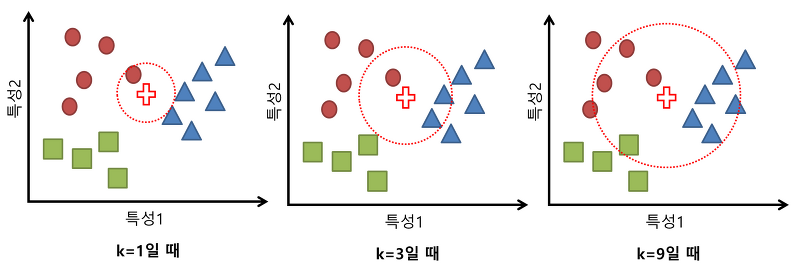

#붓꽃데이터 분류
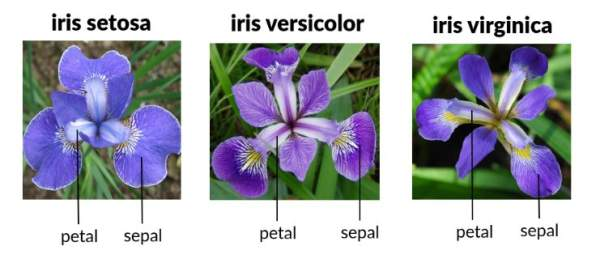

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 준비

In [2]:
import pandas as pd
import numpy as np

In [3]:
iris = pd.read_csv('/content/drive/My Drive/2022_Mobile_AI_AIHUB/iris.csv')

In [4]:
iris.head(10)

caseno  SepalLength  SepalWidth  PetalLength  PetalWidth Species
0       1          5.1         3.5          1.4         0.2  setosa
1       2          4.9         3.0          1.4         0.2  setosa
2       3          4.7         3.2          1.3         0.2  setosa
3       4          4.6         3.1          1.5         0.2  setosa
4       5          5.0         3.6          1.4         0.2  setosa
5       6          5.4         3.9          1.7         0.4  setosa
6       7          4.6         3.4          1.4         0.3  setosa
7       8          5.0         3.4          1.5         0.2  setosa
8       9          4.4         2.9          1.4         0.2  setosa
9      10          4.9         3.1          1.5         0.1  setosa

In [5]:
iris.tail()

caseno  SepalLength  SepalWidth  PetalLength  PetalWidth    Species
145     146          6.7         3.0          5.2         2.3  virginica
146     147          6.3         2.5          5.0         1.9  virginica
147     148          6.5         3.0          5.2         2.0  virginica
148     149          6.2         3.4          5.4         2.3  virginica
149     150          5.9         3.0          5.1         1.8  virginica

In [6]:
iris.describe()

caseno  SepalLength  SepalWidth  PetalLength  PetalWidth
count  150.000000   150.000000  150.000000   150.000000  150.000000
mean    75.500000     5.843333    3.057333     3.758000    1.199333
std     43.445368     0.828066    0.435866     1.765298    0.762238
min      1.000000     4.300000    2.000000     1.000000    0.100000
25%     38.250000     5.100000    2.800000     1.600000    0.300000
50%     75.500000     5.800000    3.000000     4.350000    1.300000
75%    112.750000     6.400000    3.300000     5.100000    1.800000
max    150.000000     7.900000    4.400000     6.900000    2.500000

In [7]:
# print(iris['Species'])
iris1 = iris['PetalLength']
iris1

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLength, Length: 150, dtype: float64

In [8]:
print(iris['Species'])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object


In [9]:
print(np.unique(iris['Species']))

['setosa' 'versicolor' 'virginica']


In [10]:
print(iris.columns)

Index(['caseno', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'Species'],
      dtype='object')


In [11]:
iris[['SepalLength', 'SepalWidth']]

SepalLength  SepalWidth
0            5.1         3.5
1            4.9         3.0
2            4.7         3.2
3            4.6         3.1
4            5.0         3.6
..           ...         ...
145          6.7         3.0
146          6.3         2.5
147          6.5         3.0
148          6.2         3.4
149          5.9         3.0

[150 rows x 2 columns]

In [12]:
iris = iris[['PetalLength', 'PetalWidth', 'Species']]

In [13]:
iris.head()

PetalLength  PetalWidth Species
0          1.4         0.2  setosa
1          1.4         0.2  setosa
2          1.3         0.2  setosa
3          1.5         0.2  setosa
4          1.4         0.2  setosa

In [14]:
setosa = iris[iris.Species=='setosa']
versicolor = iris[iris.Species=='versicolor']
virginica = iris[iris.Species=='virginica']

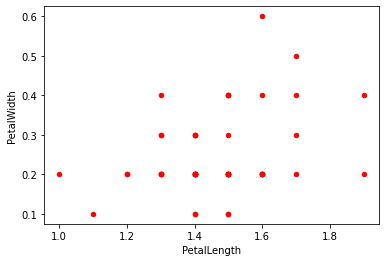

In [15]:
setosa.plot.scatter(x='PetalLength', y='PetalWidth', c='r')

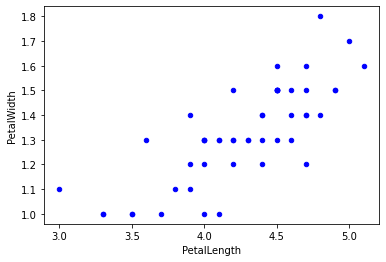

In [16]:
versicolor.plot.scatter(x='PetalLength', y='PetalWidth', c='b')

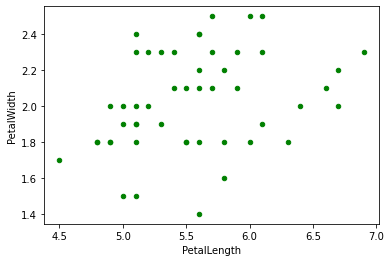

In [17]:
virginica.plot.scatter(x='PetalLength', y='PetalWidth', c='g')

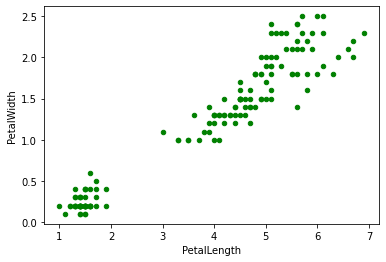

In [18]:
iris.plot.scatter(x='PetalLength', y='PetalWidth', c='g')

## Data와 Target분리

In [19]:
iris_input = iris[['PetalLength', 'PetalWidth']]

In [20]:
print(iris_input.shape)

(150, 2)


In [21]:
iris_target = iris['Species']

## Dataframe을 Numpy ndarray로 변환

In [22]:
iris_input = iris_input.to_numpy()
iris_target = iris_target.to_numpy()

print(iris_input)
print(iris_target)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

## Train, Test용 데이터분리 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_input, test_input, train_target, test_target =  train_test_split(iris_input, iris_target, test_size=0.2, random_state=13)

In [25]:
print(train_input.shape, train_target.shape)

(120, 2) (120,)


In [26]:
print(test_input.shape, test_target.shape)

(30, 2) (30,)


In [27]:
print(test_input)

[[4.5 1.3]
 [3.6 1.3]
 [1.5 0.4]
 [5.1 1.9]
 [5.5 2.1]
 [1.4 0.2]
 [6.1 2.3]
 [4.9 1.8]
 [1.6 0.2]
 [4.4 1.2]
 [4.8 1.8]
 [5.1 1.5]
 [4.4 1.3]
 [1.9 0.4]
 [5.1 2.4]
 [1.6 0.2]
 [4.9 1.8]
 [5.8 2.2]
 [4.6 1.4]
 [1.4 0.2]
 [4.5 1.5]
 [1.5 0.4]
 [1.4 0.3]
 [6.1 1.9]
 [4.5 1.5]
 [5.7 2.5]
 [1.2 0.2]
 [6.9 2.3]
 [4.7 1.4]
 [5.6 2.2]]


## 표준화

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [30]:
print(test_scaled)

[[ 0.45890431  0.17947828]
 [-0.05415641  0.17947828]
 [-1.25129808 -1.01704357]
 [ 0.80094479  0.97715951]
 [ 1.02897177  1.24305325]
 [-1.30830483 -1.28293731]
 [ 1.37101225  1.508947  ]
 [ 0.68693129  0.84421264]
 [-1.19429134 -1.28293731]
 [ 0.40189756  0.04653141]
 [ 0.62992455  0.84421264]
 [ 0.80094479  0.44537202]
 [ 0.40189756  0.17947828]
 [-1.0232711  -1.01704357]
 [ 0.80094479  1.64189387]
 [-1.19429134 -1.28293731]
 [ 0.68693129  0.84421264]
 [ 1.19999201  1.37600012]
 [ 0.51591105  0.31242515]
 [-1.30830483 -1.28293731]
 [ 0.45890431  0.44537202]
 [-1.25129808 -1.01704357]
 [-1.30830483 -1.14999044]
 [ 1.37101225  0.97715951]
 [ 0.45890431  0.44537202]
 [ 1.14298526  1.77484074]
 [-1.42231832 -1.28293731]
 [ 1.82706622  1.508947  ]
 [ 0.5729178   0.31242515]
 [ 1.08597852  1.37600012]]


# k-최근접 이웃 다중분류

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [33]:
print(kn.score(test_scaled, test_target))

0.9666666666666667


In [34]:
print(kn.score(train_scaled, train_target))

0.975


In [35]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [36]:
print(kn.score(test_scaled, test_target))

0.9666666666666667


In [37]:
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=7)

In [38]:
print(kn.score(test_scaled, test_target))

0.9666666666666667


In [39]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [40]:
print(kn.score(test_scaled, test_target))

0.9666666666666667


In [41]:
kn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [42]:
print(test_target[0:10])

['versicolor' 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'versicolor']


In [43]:
print(kn.predict(test_scaled[0:10]))

['versicolor' 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'versicolor']


In [44]:
distances, indexes = kn.kneighbors(test_scaled[0:1])

In [45]:
print(distances, train_target[indexes])

[[0.05700675 0.11401349 0.11401349 0.14465352 0.14465352]] [['versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor']]
